In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
athletes = pd.read_csv('athletes.csv')

# athletes.head()

In [4]:
athletes.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [29]:
titanic = sns.load_dataset("titanic")

titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [6]:
survived_data = titanic.loc[titanic["survived"] == 1]

survived_data.groupby(["sex", "alone"])["survived"].count()

sex     alone
female  False    134
        True      99
male    False     45
        True      64
Name: survived, dtype: int64

In [7]:
survived_data.groupby(["sex"])["survived"].count()

sex
female    233
male      109
Name: survived, dtype: int64

In [40]:
bins = [0, 20, 50, 100]
labels = ["<20", "between [20, 50]", ">40"]

titanic["age_group"] = pd.cut(bins=bins, labels=labels, x = titanic["age"])

titanic.head()

# sns.countplot(data = titanic, x=titanic["age"])

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_group
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,"between [20, 50]"
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,"between [20, 50]"
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,"between [20, 50]"
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,"between [20, 50]"
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,"between [20, 50]"


In [28]:
(survived_data.groupby(["sex"])["survived"].count() / titanic.shape[0]) * 100

sex
female    26.150393
male      12.233446
Name: survived, dtype: float64

In [43]:
titanic.loc[(titanic["sex"] == "male") & (titanic["survived"] == 1)]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_group
17,1,2,male,NaN,0,0,13.0000,S,Second,man,True,NaN,Southampton,yes,True,NaN
21,1,2,male,34.0,0,0,13.0000,S,Second,man,True,D,Southampton,yes,True,"between [20, 50]"
23,1,1,male,28.0,0,0,35.5000,S,First,man,True,A,Southampton,yes,True,"between [20, 50]"
36,1,3,male,NaN,0,0,7.2292,C,Third,man,True,NaN,Cherbourg,yes,True,NaN
55,1,1,male,NaN,0,0,35.5000,S,First,man,True,C,Southampton,yes,True,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
838,1,3,male,32.0,0,0,56.4958,S,Third,man,True,NaN,Southampton,yes,True,"between [20, 50]"
839,1,1,male,NaN,0,0,29.7000,C,First,man,True,C,Cherbourg,yes,True,NaN
857,1,1,male,51.0,0,0,26.5500,S,First,man,True,E,Southampton,yes,True,>40
869,1,3,male,4.0,1,1,11.1333,S,Third,child,False,NaN,Southampton,yes,False,<20


In [55]:
data = titanic.groupby(["sex", "age_group"])["survived"].value_counts()

data
# sns.barplot(x = data.index, y = data.values, data = data)

sex     age_group         survived
female  <20               1            53
                          0            24
        between [20, 50]  1           128
                          0            39
        >40               1            16
                          0             1
male    <20               0            73
                          1            29
        between [20, 50]  0           246
                          1            58
        >40               0            41
                          1             6
Name: survived, dtype: int64

<AxesSubplot:xlabel='class', ylabel='count'>

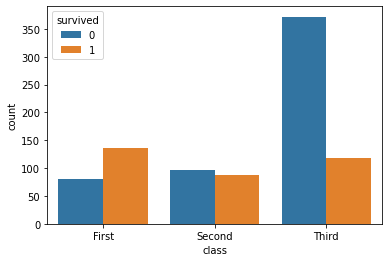

In [57]:
sns.countplot(x = titanic["class"], data = titanic, hue = titanic["survived"])

In [64]:
titanic.groupby(["sex", "alone", "age_group"])["survived"].count().sort_values()

sex     alone  age_group       
female  True   >40                   6
male    False  >40                  10
female  False  >40                  11
        True   <20                  19
male    True   >40                  37
               <20                  47
        False  <20                  55
female  False  <20                  58
        True   between [20, 50]     75
male    False  between [20, 50]     84
female  False  between [20, 50]     92
male    True   between [20, 50]    220
Name: survived, dtype: int64

<AxesSubplot:xlabel='alone', ylabel='age'>

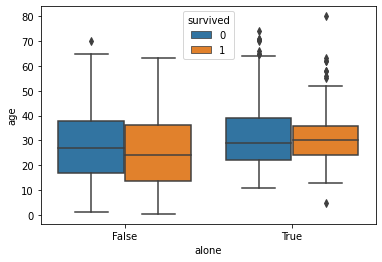

In [63]:
sns.boxplot(data=titanic, x="alone", y = "age", hue = "survived")